# Manual Implementation of Linear Regression
In this notebook I have manually implemented linear regression including the Cost function and the Gradient Descent


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [6]:
x_train = np.array([1.0,2.0])
y_train = np.array([300.0,500.0])
print(x_train,y_train)

[1. 2.] [300. 500.]


In [7]:
m = x_train.shape[0]
print(m)

2


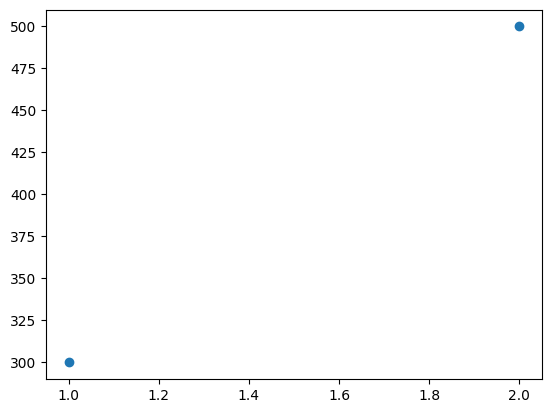

In [8]:
plt.scatter(x_train,y_train)

In [9]:
def computeModel(x,w,b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w*x[i]+b
    return f_wb

In [10]:
def computeCost(x,y,w,b):
    m = len(x)
    f_wb = computeModel(x,w,b)
    total_cost = 0
    for i in range(m):
        total_cost += (f_wb[i]-y[i])**2
    total_cost *= 1/(2*m)
    return total_cost

In [11]:
def computeGradient(x,y,w,b):
    m = len(x)
    dj_dw,dj_db = 0,0
    for i in range(m):
        f_wb = w*x[i]+b
        dj_db_i = f_wb-y[i]
        dj_dw_i = dj_db_i*x[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw /=m
    dj_db /=m
    return dj_dw,dj_db

In [28]:
def gradientDescent(x,y,w_in,b_in,alpha,num_itrs):
    w,b = copy.deepcopy(w_in),copy.deepcopy(b_in)
    w,b = w,b
    cost_hist = []
    p_hist = []
    for i in range(num_itrs):
        dj_dw,dj_db = computeGradient(x,y,w,b)
        w -= alpha*dj_dw
        b -= alpha*dj_db
        cost_hist.append(computeCost(x,y,w,b))
        if i% math.ceil(num_itrs/10) == 0:
            print(f"Iteration {i:4}: Cost {cost_hist[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w,b

In [31]:
w_init = 0
b_init = 0
itrs = 10000
alpha = 1.0e-2
w_final,b_final = gradientDescent(x_train,y_train,w_init,b_init,alpha,itrs)
print(w_final,b_final)

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02
